In [9]:
import pandas as pd
import matplotlib.pyplot as plt 
import nltk,re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [10]:
df= pd.read_csv('recession_2023_india_tweets_dataset.csv')
df 

,date,id,content,username,likeCount,retweetCount
0,2022-11-30 04:17:49+00:00,1597807084934172672,📌 @elonmusk begins hiring for Twitter 2.0 afte...,workflexitweets,1,1
1,2022-11-30 02:48:10+00:00,1597784522728558592,"Global Recession से दुनिया हुई बेहाल, लेकिन In...",indilinks,0,0
2,2022-11-29 17:21:57+00:00,1597642029479038976,Will global recession impact India or not? #re...,BizzBuzzNews,0,0
3,2022-11-29 11:40:40+00:00,1597556142213070850,Is Recession In India Coming Soon?\n\nWant to ...,Anubhav74782862,0,0
4,2022-11-29 10:12:57+00:00,1597534071202385922,A report by #realestate data collation &amp; r...,indiaoutbound,1,0
...,...,...,...,...,...,...
5171,2009-03-16 11:32:55+00:00,1335812277,"India beats recession blues, back on FDI radar...",businessline,0,0
5172,2009-03-03 18:06:09+00:00,1274780157,One lakh indian will return home to india in n...,gmishra,0,0
5173,2009-02-26 03:51:33+00:00,1252271774,Puneet doubts that any economy (BRIC or not) i...,PuneetLamba,0,0
5174,2009-02-02 16:26:53+00:00,1170205890,Wow! So many guys who did their MS in US are b...,theravishankar,0,0


In [11]:
df = df.drop(['date','id','username', 'likeCount','retweetCount'], axis=1)
df

,content
0,📌 @elonmusk begins hiring for Twitter 2.0 afte...
1,"Global Recession से दुनिया हुई बेहाल, लेकिन In..."
2,Will global recession impact India or not? #re...
3,Is Recession In India Coming Soon?\n\nWant to ...
4,A report by #realestate data collation &amp; r...
...,...
5171,"India beats recession blues, back on FDI radar..."
5172,One lakh indian will return home to india in n...
5173,Puneet doubts that any economy (BRIC or not) i...
5174,Wow! So many guys who did their MS in US are b...


In [12]:
df.isnull().sum() # checking null rows

content    0
dtype: int64

In [14]:
def clean(text):
    text=str(text).lower()
    text=re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text
df['content'] = df['content'].apply(clean)
df

,content
0,elonmusk begins hiring for twitter 20 after f...
1,global recession india \nglobal...
2,will global recession impact india or not rece...
3,is recession in india coming soon\n\nwant to k...
4,a report by realestate data collation amp rese...
...,...
5171,india beats recession blues back on fdi radar ...
5172,one lakh indian will return home to india in n...
5173,puneet doubts that any economy bric or not is ...
5174,wow so many guys who did their ms in us are ba...


In [15]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Define a function to classify sentiment based on scores
def classify_sentiment(text):
    score = SentimentIntensityAnalyzer().polarity_scores(text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    if neg > pos:
        return 'Negative'
    elif pos > neg:
        return 'Positive'
    else:
        return 'Neutral'

# Apply the function to each tweet in the 'Tweet' column and store the result in a new column 'Sentiment'
df['Sentiment'] = df['content'].apply(classify_sentiment)


In [17]:
df

,content,Sentiment
0,elonmusk begins hiring for twitter 20 after f...,Negative
1,global recession india \nglobal...,Negative
2,will global recession impact india or not rece...,Negative
3,is recession in india coming soon\n\nwant to k...,Negative
4,a report by realestate data collation amp rese...,Negative
...,...,...
5171,india beats recession blues back on fdi radar ...,Negative
5172,one lakh indian will return home to india in n...,Negative
5173,puneet doubts that any economy bric or not is ...,Negative
5174,wow so many guys who did their ms in us are ba...,Positive


In [18]:
def count_tp_in_column(data,feature):
  total = data.loc[:,feature].value_counts(dropna=False)
  percentage = data.loc[:,feature].value_counts(dropna=False, normalize=True)*100
  return pd.concat([total, round(percentage,2)], axis=1, keys=['Total', 'Percentage'])

tp = count_tp_in_column(df,'Sentiment')
tp

,Total,Percentage
Sentiment,,
Negative,4297,83.02
Positive,794,15.34
Neutral,85,1.64


<module 'matplotlib.pyplot' from 'c:\\Users\\Asus\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

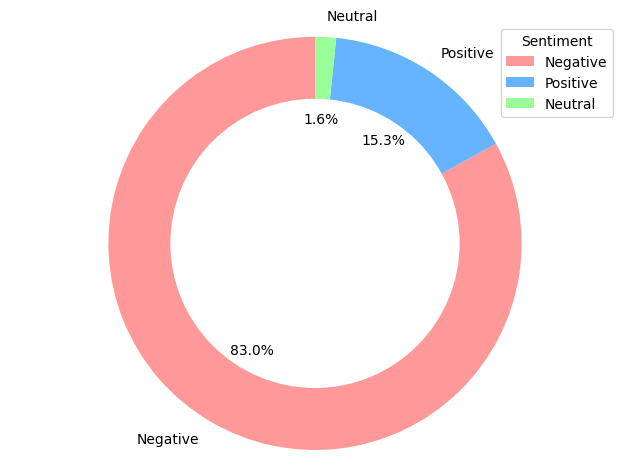

In [19]:

labels = tp.index
sizes = tp['Percentage']
colors = ['#ff9999','#66b3ff','#99ff99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.legend(title='Sentiment')
plt

<module 'matplotlib.pyplot' from 'c:\\Users\\Asus\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

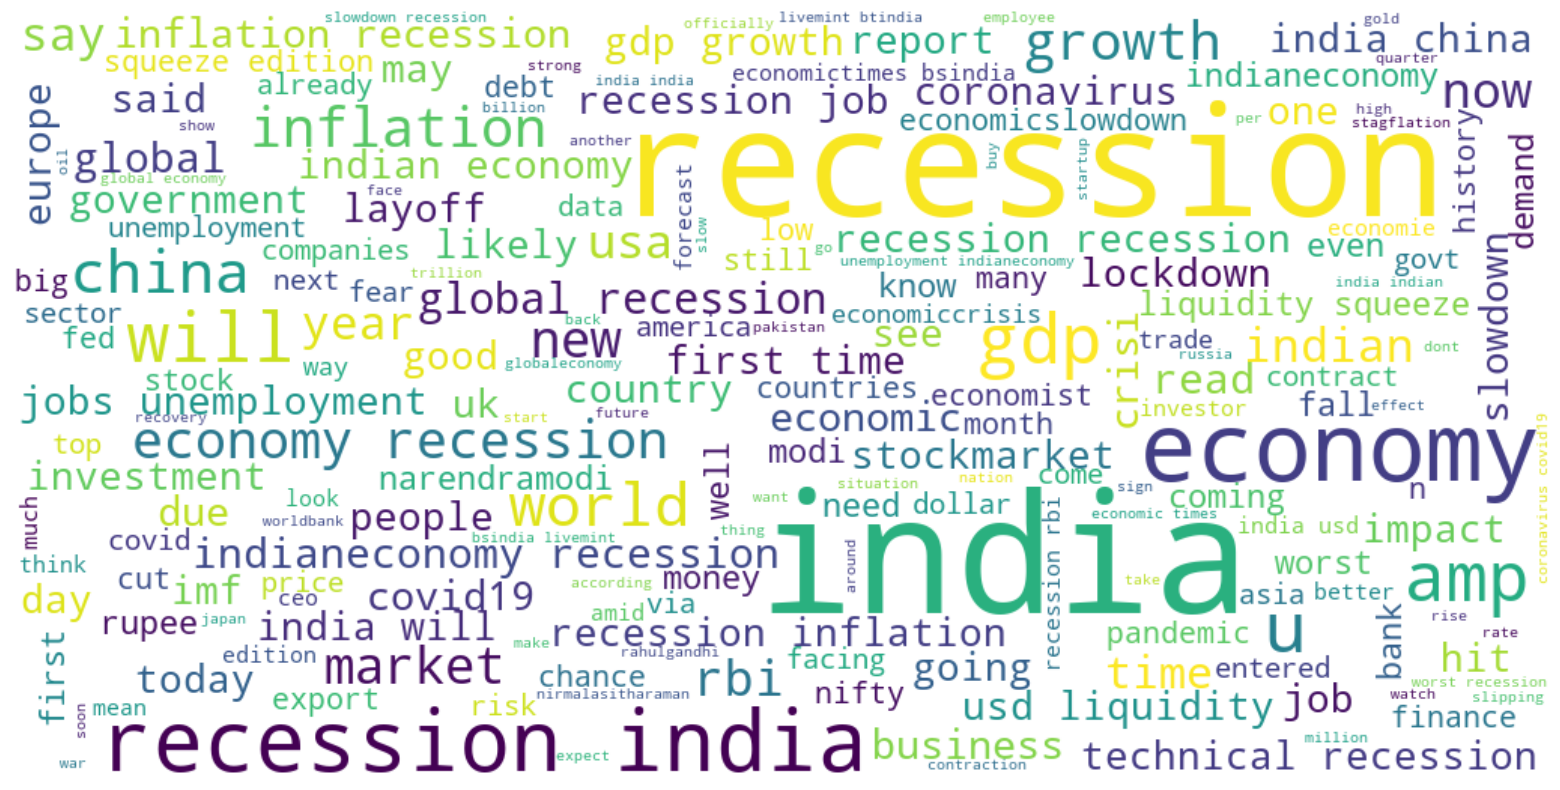

In [20]:
all_tweets = " ".join(tweet for tweet in df['content'])

wordcloud = WordCloud(width=1024, height=512, random_state=21, max_font_size=110, background_color='white').generate(all_tweets)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt